In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import linear_model, preprocessing

from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

from sklearn.tree import plot_tree

import matplotlib.pyplot as plt


In [2]:
data_raw = pd.read_csv("TrainingWiDS2021.csv")
data_raw = data_raw.sample(n=5000, random_state=42)
data_selected = data_raw[["age", "bmi", "gender", "height", "diabetes_mellitus"]]
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 71328 to 76569
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4806 non-null   float64
 1   bmi                4820 non-null   float64
 2   gender             4999 non-null   object 
 3   height             4916 non-null   float64
 4   diabetes_mellitus  5000 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 234.4+ KB


In [3]:
# Note that sklearn decision tree does not work with object data. 

# need to encode and convert this to categorical

# I was running into an issue where it was being encoded to 0 and 1 but they were still object type variable which will give you an error

# always check the error messages and go back to fix your code
le= LabelEncoder()

# also note if you run this line twice it will give ou an error

In [4]:
data_selected.loc[:,"gender"] = le.fit_transform(data_selected["gender"])

data_selected.loc[:,"gender"] = data_selected["gender"].astype("category")

In [5]:
data_final =data_selected[(data_selected.age>=20) & (data_selected.age<=65) & 
                          (data_selected.bmi>=25) & (data_selected.bmi<45) &
                          (data_selected.height>100) & (data_selected.height<200)].dropna()

In [6]:
data_final.isna().sum()

age                  0
bmi                  0
gender               0
height               0
diabetes_mellitus    0
dtype: int64

In [7]:
# Now lets create test train split
y = data_final["diabetes_mellitus"]
X = data_final.drop(columns=["diabetes_mellitus"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [8]:

RF_clf = RandomForestClassifier(n_estimators=50, random_state=99)
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7318681318681318

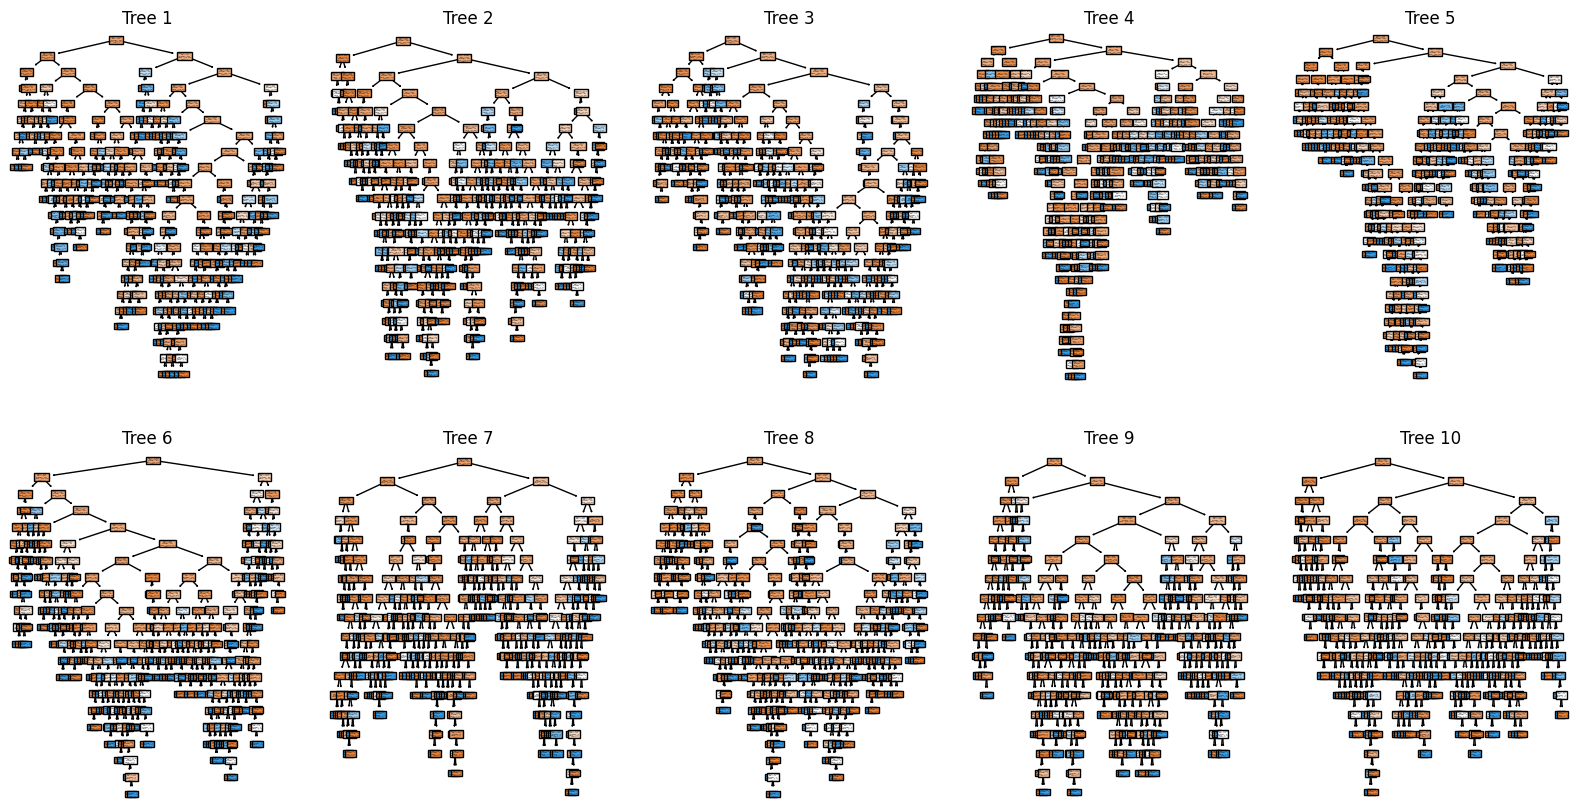

In [18]:
# Step 3: Visualize individual decision trees within the forest
plt.figure(figsize=(20, 10))
for i in range(min(len(RF_clf.estimators_),10)):
    plt.subplot(2, 5, i + 1)
    plot_tree(RF_clf.estimators_[i], feature_names=X_train.columns, class_names=["0","1"], filled=True)
    plt.title(f'Tree {i+1}')
plt.show()

[Text(0.3812698733319433, 0.9772727272727273, 'bmi <= 31.195\ngini = 0.33\nsamples = 666\nvalue = [839, 221]\nclass = 0'),
 Text(0.12416597164303586, 0.9318181818181818, 'age <= 41.5\ngini = 0.267\nsamples = 358\nvalue = [473, 89]\nclass = 0'),
 Text(0.04670558798999166, 0.8863636363636364, 'height <= 164.05\ngini = 0.15\nsamples = 79\nvalue = [124, 11]\nclass = 0'),
 Text(0.040033361134278564, 0.8409090909090909, 'gini = 0.0\nsamples = 26\nvalue = [48, 0]\nclass = 0'),
 Text(0.05337781484570475, 0.8409090909090909, 'height <= 176.15\ngini = 0.221\nsamples = 53\nvalue = [76.0, 11.0]\nclass = 0'),
 Text(0.040033361134278564, 0.7954545454545454, 'age <= 34.5\ngini = 0.388\nsamples = 24\nvalue = [28, 10]\nclass = 0'),
 Text(0.03336113427856547, 0.75, 'age <= 33.5\ngini = 0.486\nsamples = 15\nvalue = [14, 10]\nclass = 0'),
 Text(0.026688907422852376, 0.7045454545454546, 'height <= 174.15\ngini = 0.444\nsamples = 13\nvalue = [14, 7]\nclass = 0'),
 Text(0.013344453711426188, 0.65909090909090

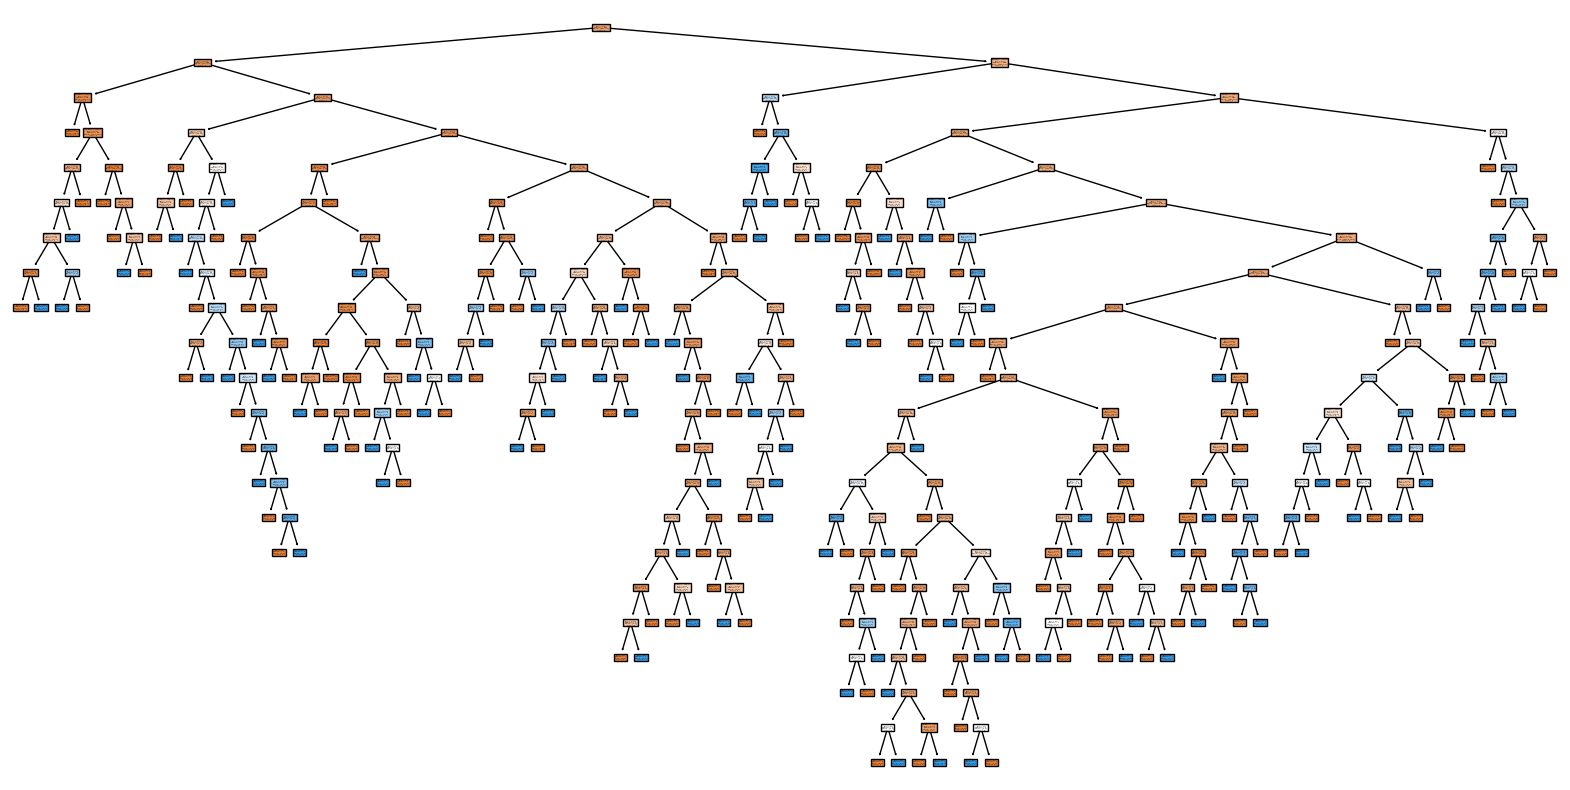

In [15]:
# looking at individual trees
plt.figure(figsize=(20, 10))
plot_tree(RF_clf.estimators_[0], feature_names=X_train.columns, class_names=["0","1"], filled=True)

In [20]:
#THere just a lot of braches so i want to set max depth
RF_clf_5d = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=99)

RF_clf_5d.fit(X_train, y_train)

RF_clf_5d.score(X_test, y_test)

0.7868131868131868

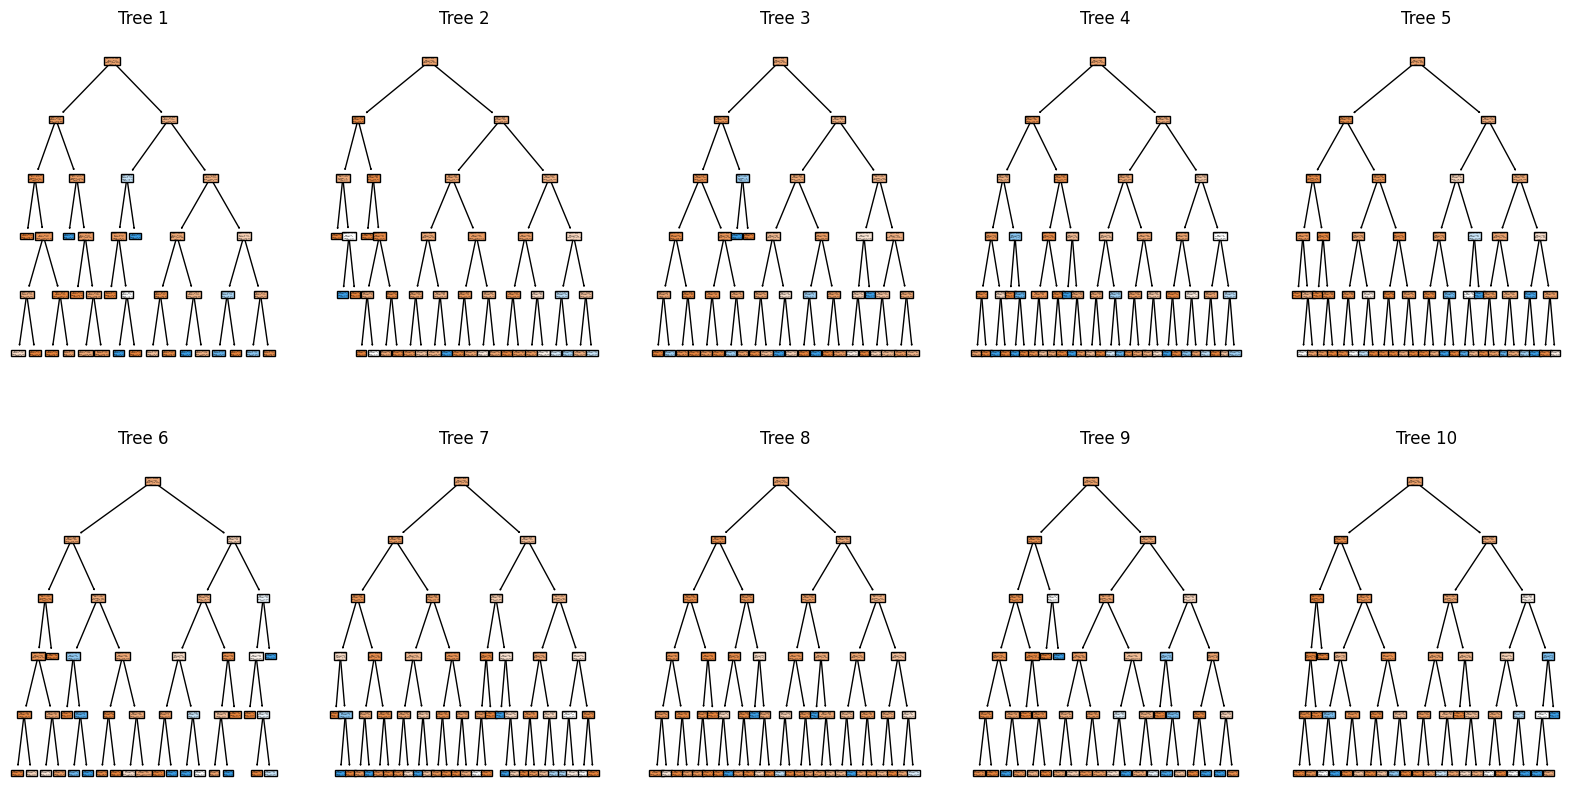

In [21]:
# Step 3: Visualize individual decision trees within the forest
plt.figure(figsize=(20, 10))
for i in range(min(len(RF_clf.estimators_),10)):
    plt.subplot(2, 5, i + 1)
    plot_tree(RF_clf_5d.estimators_[i], feature_names=X_train.columns, class_names=["0","1"], filled=True)
    plt.title(f'Tree {i+1}')
plt.show()

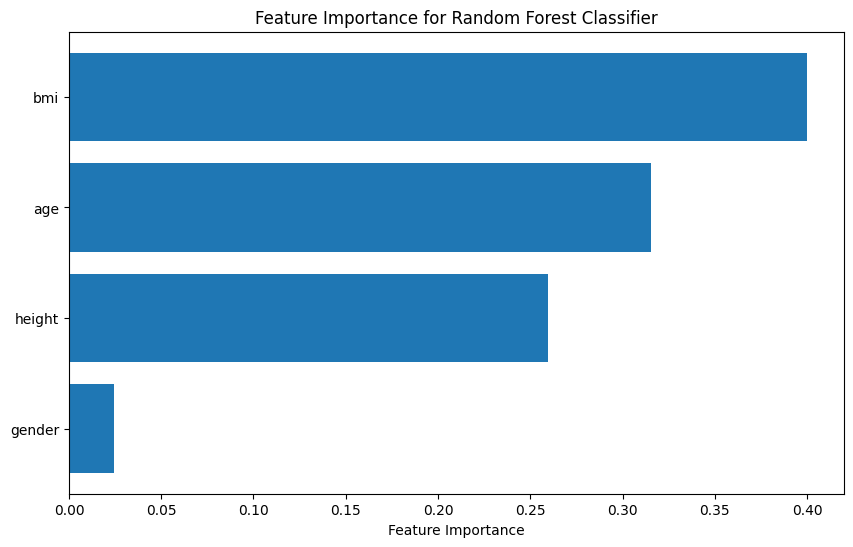

In [22]:
# Step 4: Visualize feature importance
feature_importance = RF_clf_5d.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(feature_importance)), np.array(X_train.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest Classifier')
plt.show()